In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(x)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [41]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=10,random_state=42,gamma=0.1)
sc.fit(x)

,"n_clusters n_clusters: int, default=8The dimension of the projection subspace.",10
,"eigen_solver eigen_solver: {'arpack', 'lobpcg', 'amg'}, default=NoneThe eigenvalue decomposition strategy to use. AMG requires pyamgto be installed. It can be faster on very large, sparse problems,but may also lead to instabilities. If None, then ``'arpack'`` isused. See [4]_ for more details regarding `'lobpcg'`.",None
,"n_components n_components: int, default=NoneNumber of eigenvectors to use for the spectral embedding. If None,defaults to `n_clusters`.",None
,"random_state random_state: int, RandomState instance, default=NoneA pseudo random number generator used for the initializationof the lobpcg eigenvectors decomposition when `eigen_solver =='amg'`, and for the K-Means initialization. Use an int to makethe results deterministic across calls (See:term:`Glossary `)... note:: When using `eigen_solver == 'amg'`, it is necessary to also fix the global numpy seed with `np.random.seed(int)` to get deterministic results. See https://github.com/pyamg/pyamg/issues/139 for further information.",42
,"n_init n_init: int, default=10Number of time the k-means algorithm will be run with differentcentroid seeds. The final results will be the best output of n_initconsecutive runs in terms of inertia. Only used if``assign_labels='kmeans'``.",10
,"gamma gamma: float, default=1.0Kernel coefficient for rbf, poly, sigmoid, laplacian and chi2 kernels.Ignored for ``affinity='nearest_neighbors'``, ``affinity='precomputed'``or ``affinity='precomputed_nearest_neighbors'``.",0.1
,"affinity affinity: str or callable, default='rbf'How to construct the affinity matrix. - 'nearest_neighbors': construct the affinity matrix by computing a graph of nearest neighbors. - 'rbf': construct the affinity matrix using a radial basis function (RBF) kernel. - 'precomputed': interpret ``X`` as a precomputed affinity matrix, where larger values indicate greater similarity between instances. - 'precomputed_nearest_neighbors': interpret ``X`` as a sparse graph of precomputed distances, and construct a binary affinity matrix from the ``n_neighbors`` nearest neighbors of each instance. - one of the kernels supported by :func:`~sklearn.metrics.pairwise.pairwise_kernels`.Only kernels that produce similarity scores (non-negative values thatincrease with similarity) should be used. This property is not checkedby the clustering algorithm.",'rbf'
,"n_neighbors n_neighbors: int, default=10Number of neighbors to use when constructing the affinity matrix usingthe nearest neighbors method. Ignored for ``affinity='rbf'``.",10
,"eigen_tol eigen_tol: float, default=""auto""Stopping criterion for eigen decomposition of the Laplacian matrix.If `eigen_tol=""auto""` then the passed tolerance will depend on the`eigen_solver`:- If `eigen_solver=""arpack""`, then `eigen_tol=0.0`;- If `eigen_solver=""lobpcg""` or `eigen_solver=""amg""`, then `eigen_tol=None` which configures the underlying `lobpcg` solver to automatically resolve the value according to their heuristics. See, :func:`scipy.sparse.linalg.lobpcg` for details.Note that when using `eigen_solver=""lobpcg""` or `eigen_solver=""amg""`values of `tol<1e-5` may lead to convergence issues and should beavoided... versionadded:: 1.2 Added 'auto' option.",'auto'
,"assign_labels assign_labels: {'kmeans', 'discretize', 'cluster_qr'}, default='kmeans'The strategy for assigning labels in the embedding space. There are twoways to assign labels after the Laplacian embedding. k-means is apopular choice, but it can be sensitive to initialization.Discretization is another approach which is less sensitive to randominitialization [3]_.The cluster_qr method [5]_ directly extract clusters from eigenvectorsin spectral clustering. In contrast to k-means and discretization, cluster_qrhas no tuning parameters and runs no iterations, yet may outperformk-means and discretization in terms of both quality and speed... versionchanged:: 1.1 Added new labeling method 'cluster_qr

In [42]:
label=sc.labels_
label

array([7, 6, 8, 6, 7, 6, 8, 4, 8, 6, 8, 4, 8, 6, 8, 6, 7, 6, 7, 4, 7, 6,
       8, 6, 8, 6, 7, 6, 7, 6, 8, 6, 8, 6, 8, 6, 8, 6, 3, 6, 3, 6, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 9, 3, 9, 0, 9, 0, 9,
       3, 9, 0, 9, 0, 9, 0, 9, 0, 9, 3, 9, 0, 9, 3, 9, 0, 9, 0, 9, 0, 9,
       0, 9, 0, 9, 0, 9, 3, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9,
       0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 5, 0, 9, 0, 5, 1, 9, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [43]:
x['cluster_group']=label
supervised=x
supervised

,Annual Income (k$),Spending Score (1-100),cluster_group
0,15,39,7
1,15,81,6
2,16,6,8
3,16,77,6
4,17,40,7
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [44]:
import sklearn.metrics as metric
print(
    "Silhouette Coefficient: %0.3f"
    % metric.silhouette_score(x, label, metric="sqeuclidean")
)

Silhouette Coefficient: 0.597


In [45]:
supervised.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'cluster_group'], dtype='str')

C:\Users\Diwali 6\anaconda3\envs\ml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


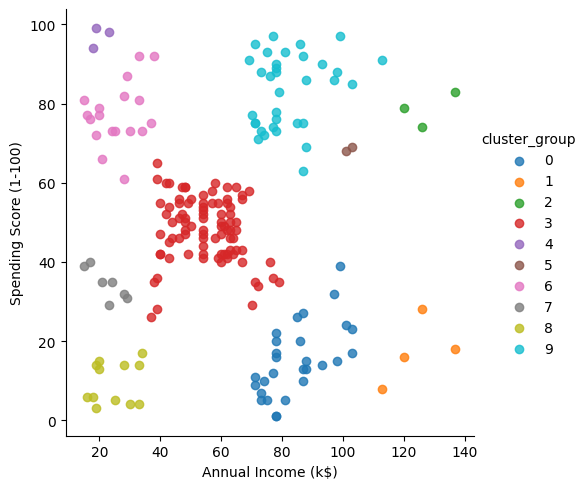

In [46]:
import seaborn as sb
sb.lmplot(data=supervised,x=supervised.columns[0],y=supervised.columns[1],hue=supervised.columns[2],fit_reg=False,legend=True,legend_out=True)